<a href="https://colab.research.google.com/github/marcoswell/Data-Science/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nome: Marcos Well**
# **Matrícula: 222018259**

In [71]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [72]:
# Carregando os dados
df = pd.read_csv('diabetes.csv', sep = ',')

# visulizando o df
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,627.0,50,1
1,1,85.0,66.0,29.0,0.0,26.6,351.0,31,0
2,8,183.0,64.0,0.0,0.0,23.3,672.0,32,1
3,1,89.0,66.0,23.0,94.0,28.1,167.0,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2288.0,33,1


# Questão 1
- Existem valores faltantes ou outliers no dataset? Se sim, como você abordaria o
tratamento dessas inconsistências? Explique as técnicas que utilizaria para lidar
com essas questões.

In [73]:
# Verificando quais colunas possuem falores faltantes
df.isna().sum(axis=0).tail()

,0
Insulin,3
BMI,11
DiabetesPedigreeFunction,1
Age,0
Outcome,0


In [74]:
# Devida a proporção de valores faltantes , optarei pela exclusão da linhas com valores faltantes
df.dropna(axis= 0, inplace = True)

# Questão 2
- Como as principais variáveis (Glucose, BloodPressure, BMI, etc.) estão
distribuídas? Utilize histogramas e boxplots para representar visualmente essas
distribuições e analise as características de cada uma.

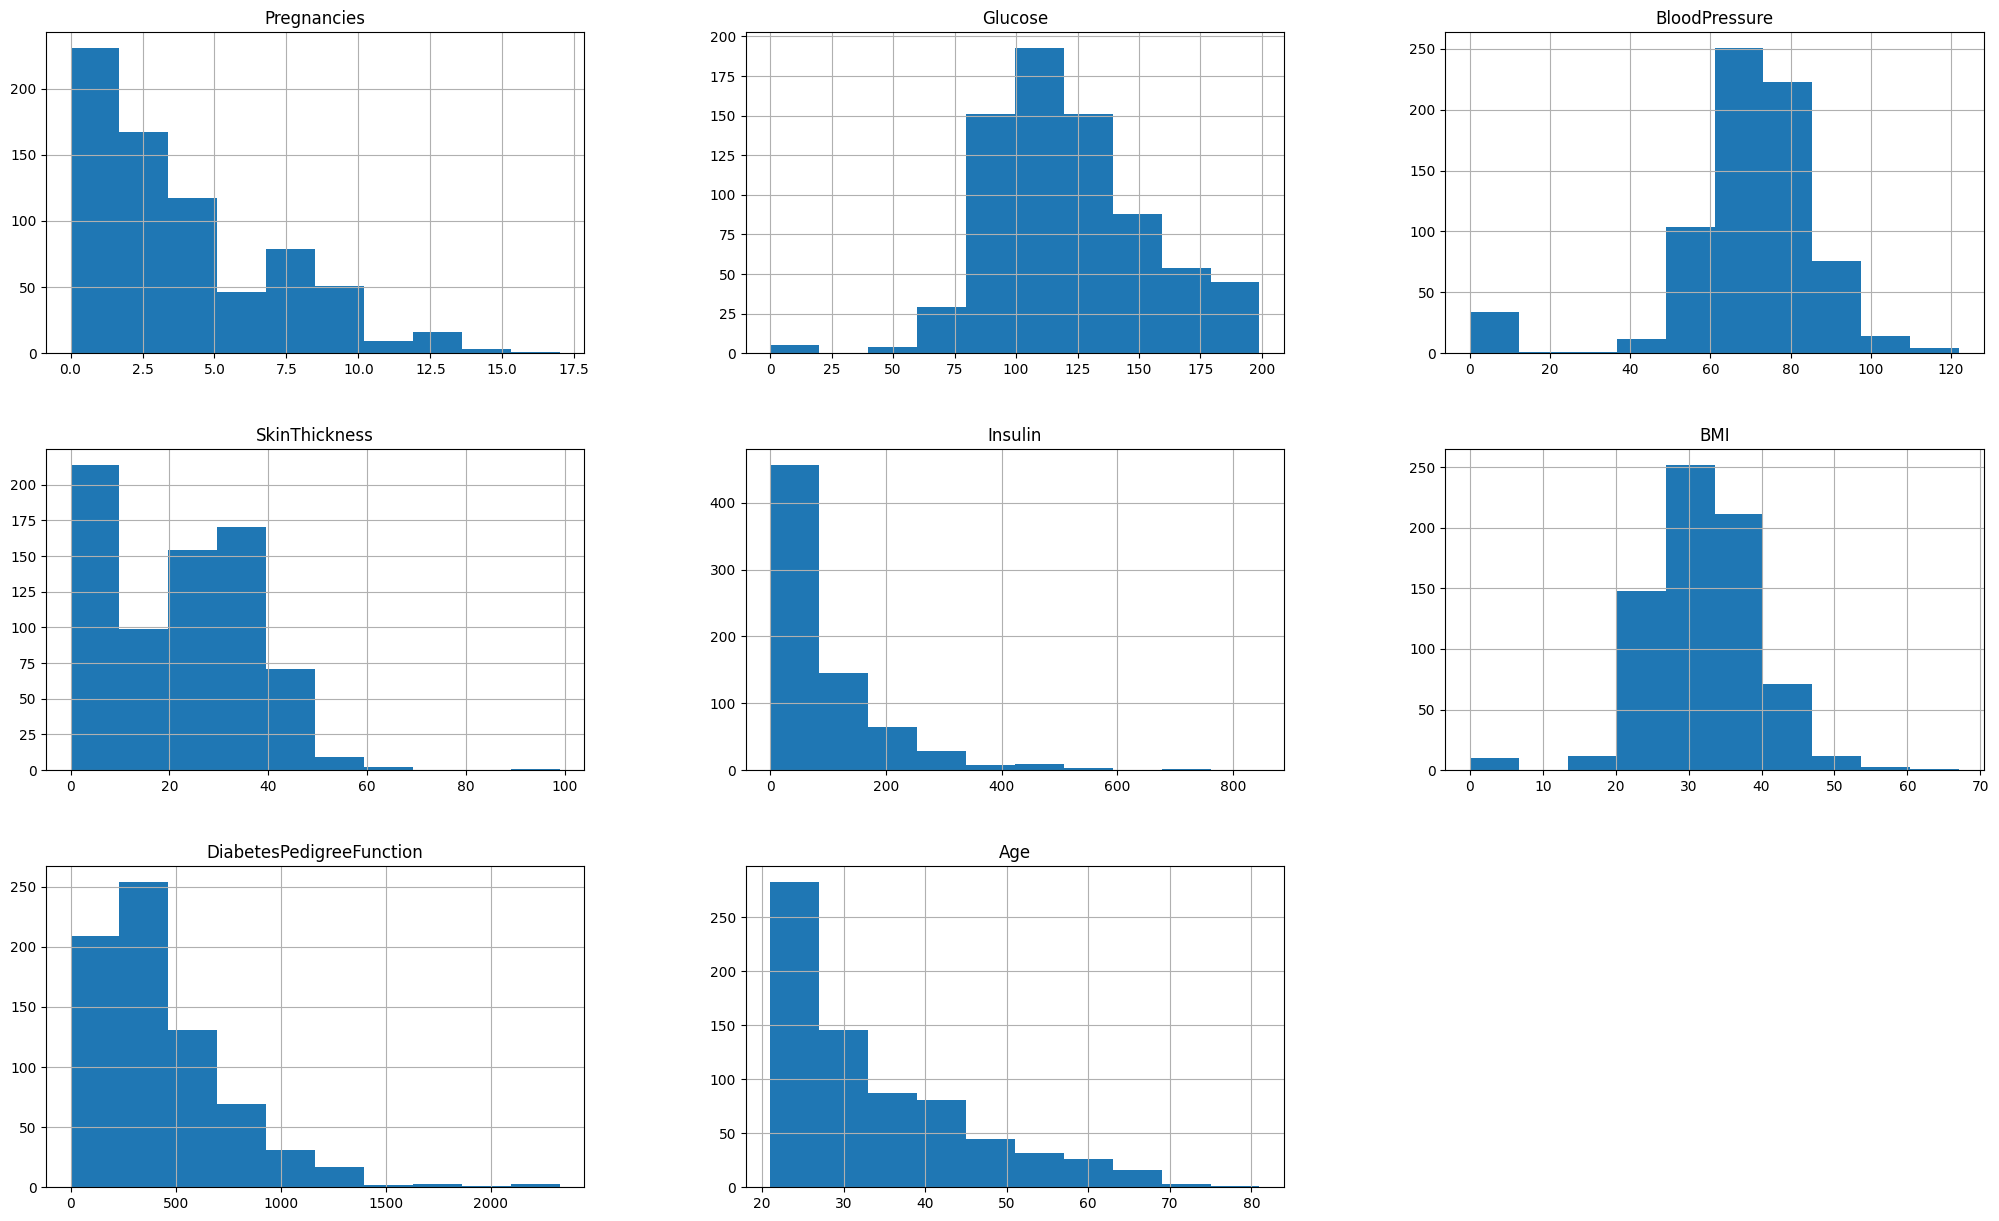

In [75]:
# plotando um histrograma das variaveis

df.iloc[:, 0:8].hist()

plt.gcf().set_size_inches(25,15);

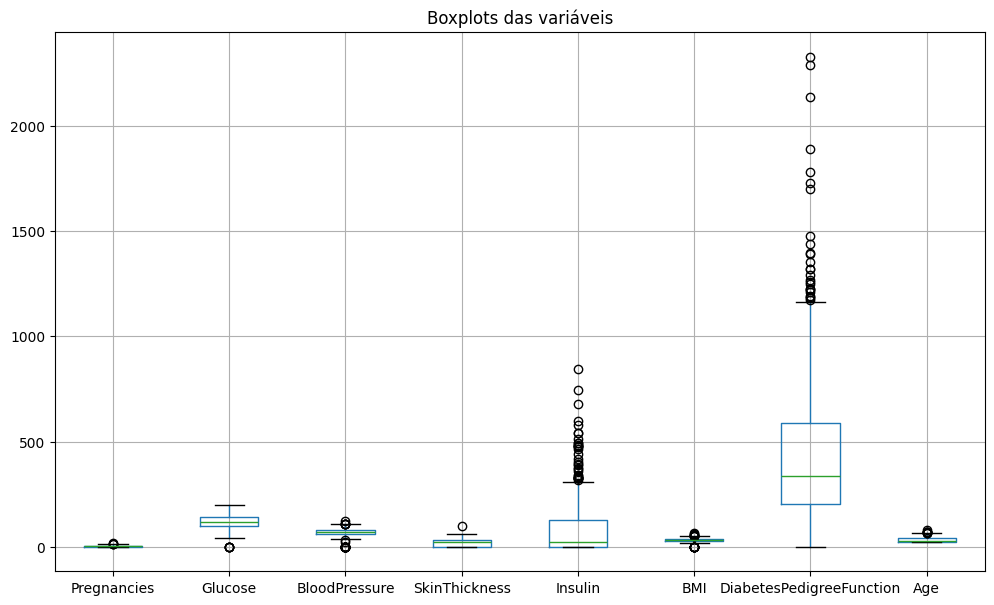

In [76]:
# visualizando os boxplots
df.iloc[:, 0:8].boxplot(figsize=(12, 7))

plt.title('Boxplots das variáveis');

# **Análise das Distribuições**
 Podemos observar que as variáveis Pregnancies, Insulin, DiabetesPedigreeFunction possuem assimetria a direita.
 Resalva para a longa calda da Insulin e DiabetesPedigreeFunction e seus outliers

# Questão 3
- Existe uma correlação entre a idade dos indivíduos e a presença de diabetes?
Realize uma análise estatística (como teste de correlação) e utilize gráficos (como
scatter plot ou boxplot) para ilustrar essa relação.

In [77]:
from scipy.stats import pointbiserialr

# Correlação entre idade e presença de diabetes e o seu p_value
correlacao, p_value= pointbiserialr(df['Outcome'], df['Age'])

print(f'Correlação : {correlacao:.3f}')
print(f'P-Value : {p_value:.3f}')

Correlação : 0.219
P-Value : 0.000


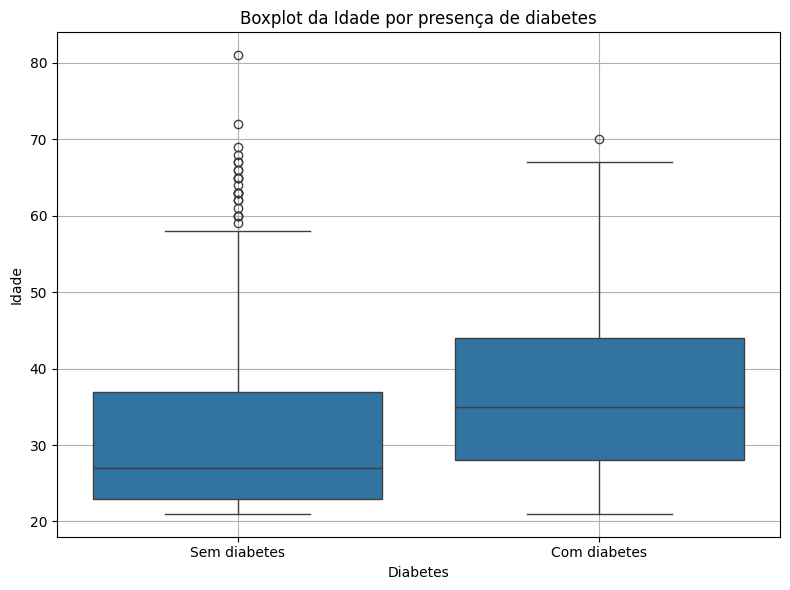

In [78]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.xticks([0, 1], ['Sem diabetes', 'Com diabetes'])
plt.title('Boxplot da Idade por presença de diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Idade')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Avaliação**
## Temos uma baixa correlação entre a idade e a presença de diabetes, porém temos um p valor estatísticamente significativo. Então podemos inferir que esta correlação não é ao acaso

# Questão 4
- Quais variáveis apresentam maior correlação com a presença de diabetes? Quais
variáveis parecem ser as mais indicativas da presença de diabetes?

In [79]:
# Verificando as variáveis com maiores correlações


# Calculando as correlações
names = df.columns[0:8]
corr = {}

for i in names:
    corr[i] = round(df[i].corr(df['Outcome']), 3)


# ordenado as correlações
corr_ordenado = dict(sorted(corr.items(), key=lambda item: abs(item[1]), reverse=True))

# Maiores correlações em ordem decrecente
corr_ordenado

{'Glucose': np.float64(0.472),
 'BMI': np.float64(0.291),
 'Age': np.float64(0.219),
 'Pregnancies': np.float64(0.203),
 'DiabetesPedigreeFunction': np.float64(0.185),
 'Insulin': np.float64(0.132),
 'BloodPressure': np.float64(0.065),
 'SkinThickness': np.float64(0.064)}

# Questão 5

- Existe uma relação entre o IMC dos pacientes e o diagnóstico de diabetes?
Compare os valores médios de IMC entre os grupos com e sem diabetes, e
analise a diferença estatisticamente

In [80]:
# Utilizando o resultado do intem anterior, podemos visualizar que o IMC é a segunda variável com maior correlação com a diabete

print(f'Correlação entre IMC(BMI) e diabetes: {corr_ordenado["BMI"]:.3f}')

Correlação entre IMC(BMI) e diabetes: 0.291


In [81]:
# Pegando os dados com e sem presença do diagnóstico de diabetes
com_diabetes = df[df['Outcome'] == 1]
sem_diabetes = df[df['Outcome'] == 0]

# Calculando á média do BMI
media_com_diabetes = round(com_diabetes['BMI'].mean(), 3)
media_sem_diabetes = round(sem_diabetes['BMI'].mean(), 3)

print('É notório que pessoas com diabetes possuem maiores IMC na média')
print(f'Média do IMC(BMI) com diabetes : {media_com_diabetes}')
print(f'Média do IMC(BMI) sem diabetes : {media_sem_diabetes}')

É notório que pessoas com diabetes possuem maiores IMC na média
Média do IMC(BMI) com diabetes : 35.124
Média do IMC(BMI) sem diabetes : 30.343


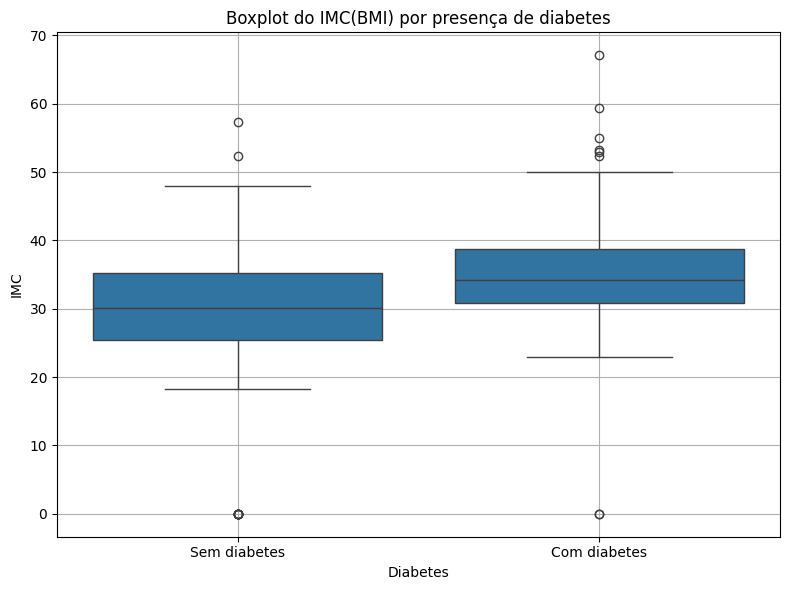

In [82]:
# Visualizando a diferença graficamente
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.xticks([0, 1], ['Sem diabetes', 'Com diabetes'])
plt.title('Boxplot do IMC(BMI) por presença de diabetes')
plt.xlabel('Diabetes')
plt.ylabel('IMC')
plt.grid(True)
plt.tight_layout()
plt.show()

# Questão 6
- Existe um valor específico de glicose que pode ser considerado crítico para o
diagnóstico de diabetes? Utilize gráficos de dispersão e cálculos estatísticos para
investigar esse ponto e definir um limite crítico, se possível

In [83]:
# Verificamos em questões anteriores que a Glicose é a variável presente com maior correlaçao com a diabte

print(f'Correlação entre Glicose(Glucose)) e diabetes: {corr_ordenado["Glucose"]:.3f}')

Correlação entre Glicose(Glucose)) e diabetes: 0.472


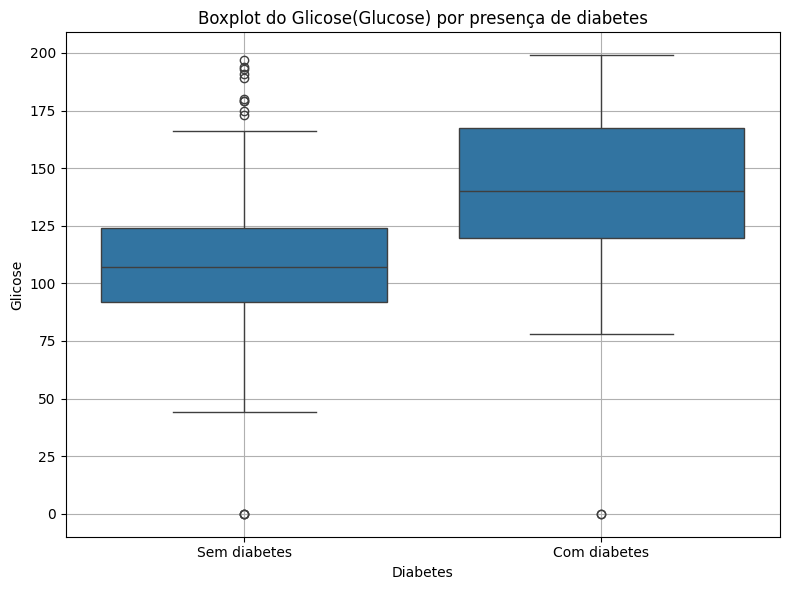

In [84]:
# O gráfico de dispersão não é o maior adequado dado a comparação entre uma variável contínua e uma binária
# Então utilizarei um gráfico de boxplot, comparando o a Glicose entre as duas populações

plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.xticks([0, 1], ['Sem diabetes', 'Com diabetes'])
plt.title('Boxplot do Glicose(Glucose) por presença de diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Glicose')
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
# Podemos notar a partir do boxplot que pessoas com diabetes em sua maioria possuem maiores Glicose


# Pegando os dados com e sem presença do diagnóstico de diabetes
com_diabetes = df[df['Outcome'] == 1]
sem_diabetes = df[df['Outcome'] == 0]

# Calculando á média do BMI
media_com_diabetes = round(com_diabetes['Glucose'].mean(), 3)
media_sem_diabetes = round(sem_diabetes['Glucose'].mean(), 3)

print('É notório que pessoas com diabetes possuem maior Glicose na média')
print(f'Média do Glicose com diabetes : {media_com_diabetes}')
print(f'Média do Glicose sem diabetes : {media_sem_diabetes}')

É notório que pessoas com diabetes possuem maior Glicose na média
Média do Glicose com diabetes : 141.782
Média do Glicose sem diabetes : 109.752


In [86]:
# Podemos utlizar como o limite crítico o valor média da Glicose de pessoas com diabete
ponto_critico = media_com_diabetes


# Calculando quantas pessoas da amostra possuem Glicose acima do ponto crítico
# pessoas com glicose acima do ponto critico com diabetes
acima_critico_com_diabete = com_diabetes[com_diabetes['Glucose'] > ponto_critico].shape[0]

# calculo da porcentagem
acima_com = round(acima_critico_com_diabete/com_diabetes.shape[0], 3)*100


# pessoas com glicose acima do ponto critico sem diabetes
acima_critico_sem_diabete = sem_diabetes[sem_diabetes['Glucose'] > ponto_critico].shape[0]
# calculo da porcentagem
acima_sem = round(acima_critico_sem_diabete/sem_diabetes.shape[0], 3)*100


print(f'Porcentagem de pessoas com diabetes com Glicose acima do ponto crítico: {acima_com:.2f}%')
print(f'Porcentagem de pessoas sem diabetes com Glicose acima do ponto crítico: {acima_sem:.2f}%')

Porcentagem de pessoas com diabetes com Glicose acima do ponto crítico: 48.80%
Porcentagem de pessoas sem diabetes com Glicose acima do ponto crítico: 11.80%


# Questão 7
- Treine um modelo de árvore de decisão para prever a presença de diabetes com
base nas variáveis do dataset. Qual foi a acurácia obtida? Discuta os resultados e
possíveis melhorias para o modelo.


In [87]:
# Criando a primeira random florest


# modelo
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from math import sqrt

In [88]:
# separando os dados com as variaveis em x e o alvo em y
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

# Separando metado do base para o treino e metade para o teste
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

In [89]:
# Utiliznado um modelo de Classificação

# Treinamento do modelo - Random Florest
rf1 = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= 4,
                            min_samples_leaf= 1, min_samples_split=2,
                            n_estimators= 150, n_jobs= 5, oob_score= True, random_state= 42)

rf1.fit(x_train, y_train) # linha que treina o modelo

RandomForestClassifier(max_depth=4, n_estimators=150, n_jobs=5, oob_score=True,
                       random_state=42)

In [90]:
# predições para o treino e teste
y_pred_train = rf1.predict(x_train)
y_pred_test = rf1.predict(x_test)

## Avaliação dos Resultados

In [91]:
# Treinamento
print(confusion_matrix(y_train, y_pred_train))
print()
print('-------------------------------------------------------------------')
print()
print(classification_report(y_train, y_pred_train))

[[229  12]
 [ 41  78]]

-------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       241
           1       0.87      0.66      0.75       119

    accuracy                           0.85       360
   macro avg       0.86      0.80      0.82       360
weighted avg       0.85      0.85      0.85       360



In [92]:
# Test
print(confusion_matrix(y_train, y_pred_test))
print()
print('-------------------------------------------------------------------')
print()
print(classification_report(y_test, y_pred_test))

[[180  61]
 [ 91  28]]

-------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       227
           1       0.72      0.48      0.58       133

    accuracy                           0.74       360
   macro avg       0.73      0.69      0.69       360
weighted avg       0.74      0.74      0.72       360



# **Avaliação Prévia dos Resultados**

## O modelo apresentou indícios de overfitting, com desempenho significativamente melhor na classificação de indivíduos sem diabetes (classe 0). No entanto, considerando um contexto médico, é mais importante garantir a correta detecção de casos positivos (classe 1), ou seja, de pessoas com diabetes.


# **Melhorando os Modelo**

## Dado que o modelo não possui novas variáveis além das originais e estas não foram agrupadas em intervalos, podemos observar quais foram as variáveis com maior importância para o treinamento da primeira Random Forest e utilizá-las para treinar outra com os mesmos parâmetros.

In [93]:
# Pegando as variáveis com mais importância para o modelo

# Pegando os nomes das vars e suas respectivas importâncias para o modelo
imp = pd.DataFrame({'Variáveis': x_train.columns, 'Importância': rf1.feature_importances_})

# Ordenando em ordem crescente
imp = imp.sort_values(by=['Importância'], ascending=False)

# Fazendo o somtório
imp['Sum'] = imp['Importância'].cumsum()

print('Total de vars: '+ str(imp.shape[0]))
imp.head(df.shape[1])

Total de vars: 8


,Variáveis,Importância,Sum
1,Glucose,0.347031,0.347031
5,BMI,0.160362,0.507393
7,Age,0.152390,0.659783
6,DiabetesPedigreeFunction,0.098502,0.758285
0,Pregnancies,0.087327,0.845613
2,BloodPressure,0.062652,0.908265
4,Insulin,0.046422,0.954686
3,SkinThickness,0.045314,1.000000


In [94]:
# Treinamento da segunda Random Florest

# Utilizaremos as variáveis que representam cerca de 80% do primeiro modelo

# Variáveis do segundo modelo
features = [
    'Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Pregnancies'
]

# separando os dados com as variaveis em x e o alvo em y
x2 = df[features]
y2 = df['Outcome']

# Separando metado do base para o treino e metade para o teste
x_train2, x_test2, y_train2 , y_test2 = train_test_split(x2, y2, test_size = 0.5, random_state = 42)

In [95]:
# Modelo com os mesmo parâmetros

# Treinamento do modelo - Random Florest
rf2 = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= 4,
                            min_samples_leaf= 1, min_samples_split=2,
                            n_estimators= 150, n_jobs= 5, oob_score= True, random_state= 42)

rf2.fit(x_train2, y_train2) # linha que treina o modelo

RandomForestClassifier(max_depth=4, n_estimators=150, n_jobs=5, oob_score=True,
                       random_state=42)

In [96]:
# predições para o treino e teste
y_pred_train2 = rf2.predict(x_train2)
y_pred_test2 = rf2.predict(x_test2)

## Avaliação dos Resultados

In [97]:
# Treinamento
print(confusion_matrix(y_train2, y_pred_train2))
print()
print('-------------------------------------------------------------------')
print()
print(classification_report(y_train2, y_pred_train2))

[[228  13]
 [ 38  81]]

-------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       241
           1       0.86      0.68      0.76       119

    accuracy                           0.86       360
   macro avg       0.86      0.81      0.83       360
weighted avg       0.86      0.86      0.85       360



In [98]:
# Test
print(confusion_matrix(y_train2, y_pred_test2))
print()
print('-------------------------------------------------------------------')
print()
print(classification_report(y_test2, y_pred_test2))

[[176  65]
 [ 86  33]]

-------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       227
           1       0.74      0.55      0.63       133

    accuracy                           0.76       360
   macro avg       0.76      0.72      0.73       360
weighted avg       0.76      0.76      0.75       360



## Comparação entre os dois modelos

In [99]:
# Acurácia dos modelos
print('--------Acurácias--------')
print('Treino modelo 1: ', round(metrics.accuracy_score(y_train, y_pred_train)*100, 3))
print('Treino modelo 2: ', round(metrics.accuracy_score(y_train2, y_pred_train2)*100, 3))
print()
print('Teste modelo 1: ', round(metrics.accuracy_score(y_test, y_pred_test)*100, 3))
print('Teste modelo 2: ', round(metrics.accuracy_score(y_test2, y_pred_test2)*100, 3))

--------Acurácias--------
Treino modelo 1:  85.278
Treino modelo 2:  85.833

Teste modelo 1:  73.889
Teste modelo 2:  76.389


# **Avaliação dos Resultados**

## Após a seleção das variáveis mais relevantes, o segundo modelo demonstrou um desempenho superior tanto no treino quanto no teste, com um ganho especialmente significativo neste último. Essa melhoria é ainda mais expressiva considerando o menor custo computacional e operacional do novo modelo em comparação com o original, o que se traduz em maior precisão nos diagnósticos de diabetes e redução nos custos de produção e implementação.

## Os próximos passos consistem em agrupar as variáveis em intervalos e aprofundar a análise do problema, visando a criação de novas variáveis que possam otimizar ainda mais o modelo.

# Questão 8
- A variável DiabetesPedigreeFunction está relacionada à presença de diabetes?
Pacientes com histórico familiar de diabetes apresentam maior risco? Realize
uma análise exploratória e estatística para verificar essa relação.
